In [1]:
from astropy.io import fits
import numpy as np
import healpy as hp
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
quasar_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-NGC-vDR16.fits')
quasar_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-SGC-vDR16.fits')
quasar_all = np.hstack((quasar_n, quasar_s))

In [2]:
random_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-NGC-vDR16.fits')
random_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-SGC-vDR16.fits')
random_all = np.hstack((random_n, random_s))

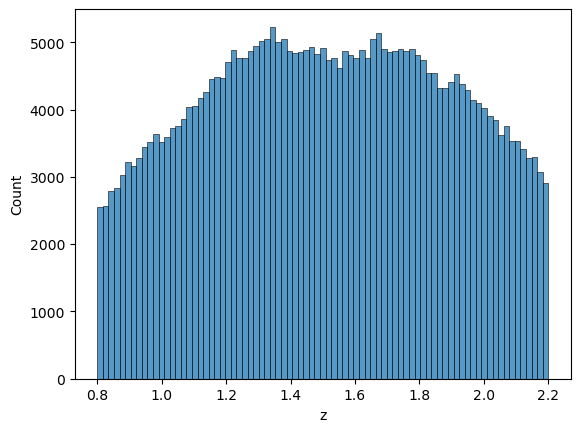

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(quasar_all['Z'], ax=ax)
ax.set_xlabel('z')
plt.savefig('./fig/quasar_lss_z')

In [10]:
from sklearn.neighbors import BallTree
quasar = quasar_all
quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
tree = BallTree(data=np.deg2rad(np.c_[quasar_SDSS['DEC'], quasar_SDSS['RA']]),
                leaf_size=5, metric='haversine')
# tree = KDTree(np.c_[quasar_SDSS['RA'], quasar_SDSS['DEC']], metric='euclidean')
que = tree.query(np.deg2rad(np.c_[quasar['DEC'], quasar['RA']]))
valid = que[0].flatten() < .5/3600*np.pi/180
index = que[1].flatten()

M_I = quasar_SDSS['M_I'][index]
M_I[~valid] = np.nan
bins = np.linspace(0.8, 2.2, 30)            # the z cut applied to quasar lss all
result = np.digitize(quasar['Z'], bins)
kind = np.zeros(len(quasar), int)
middles = []
high = []
low = []
for i in range(1, 30):
    index = np.where(result == i)[0]
    M = M_I[index]
    middle = np.percentile(M[~np.isnan(M)], 90)
    high.append(index[M <= middle])

index = np.concatenate(high)

In [14]:
quasar = quasar[index]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
# quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*quasar['WEIGHT_NOZ']*quasar['WEIGHT_CP']
np.save(f'../catalogue/quasar_lss_cut', quasar_cata)

In [4]:
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
# quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*quasar['WEIGHT_NOZ']*quasar['WEIGHT_CP']
np.save(f'../catalogue/quasar_lss_all', quasar_cata)

In [4]:
random = random_all[np.random.choice(len(random_all), len(quasar_all)*20, replace=False)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = 1
np.save(f'../catalogue/random_quasar_lss_all', random_cata)

In [5]:
random = random_all[np.random.choice(len(random_all), len(quasar_all)*20, replace=False)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = random['WEIGHT_SYSTOT']*random['WEIGHT_NOZ']*random['WEIGHT_CP']
np.save(f'../catalogue/random_quasar_lss_w', random_cata)

In [19]:
lowz = 1.5
highz = 2
prefix = '_h'

In [20]:
quasar = quasar_all[np.logical_and(quasar_all['Z']<highz, quasar_all['Z']>lowz)]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
np.save(f'../catalogue/quasar_lss{prefix}', quasar_cata)
random = random_all[np.logical_and(random_all['Z']<highz, random_all['Z']>lowz)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = 1
np.save(f'../catalogue/random_quasar_lss{prefix}', np.random.choice(random_cata, len(quasar_cata)*20, replace=False))

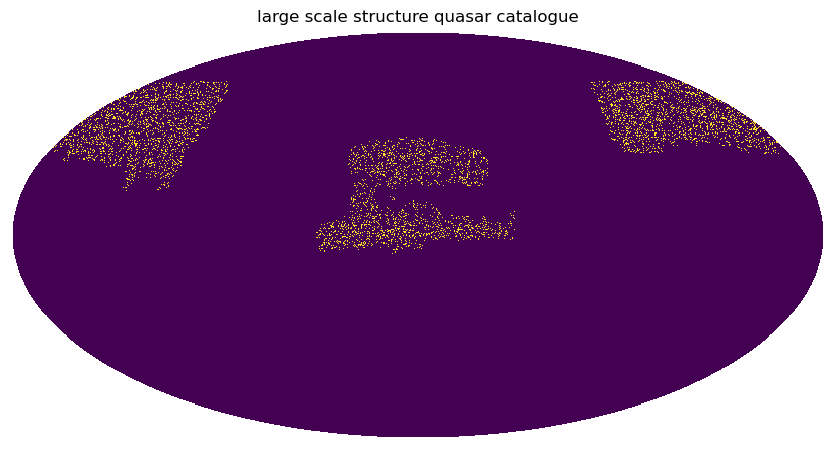

In [23]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-quasar_cata['dec']), np.deg2rad(quasar_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar catalogue', cbar=False)
plt.savefig('./fig/lss')

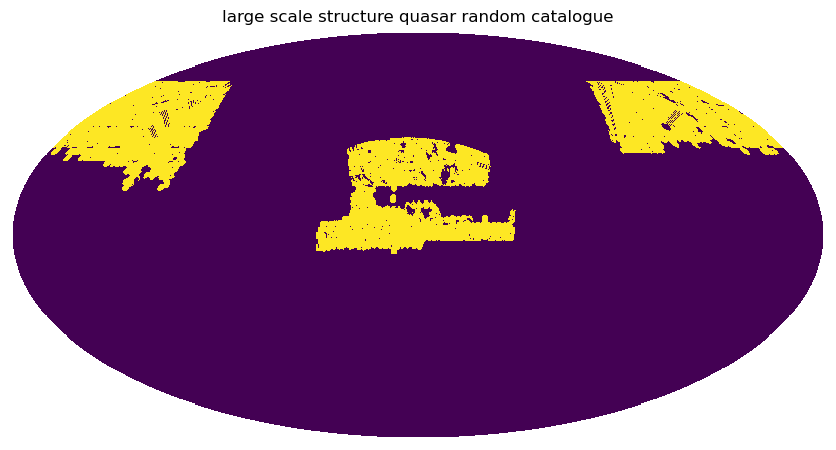

In [25]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-random_cata['dec']), np.deg2rad(random_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar random catalogue', cbar=False)

Try matching

quasar lss catalogue has QSO ID, which can be matched to quasar lss full data file.
We can also consider matching th position to SDSS 16Q quasar, which has absolute magenitude.

In [3]:
quasar_all['QSO_ID']

array([583496, 367863, 406415, ...,  80392, 138044, 136739])

In [4]:
quasar_all_data = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_full_ALLdata-vDR16.fits')
quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
quasar_SDSS_super = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_Superset_v3.fits')

In [6]:
from sklearn.neighbors import KDTree

In [7]:
tree = KDTree(np.c_[quasar_SDSS['RA'], quasar_SDSS['DEC']], metric='euclidean')

In [8]:
que = tree.query(np.c_[quasar_all['RA'], quasar_all['DEC']])

In [9]:
valid = que[0] < 5/3600
index = que[1]
M_I = quasar_SDSS['M_I'][index]
M_I[~valid] = np.nan

<Axes: ylabel='Count'>

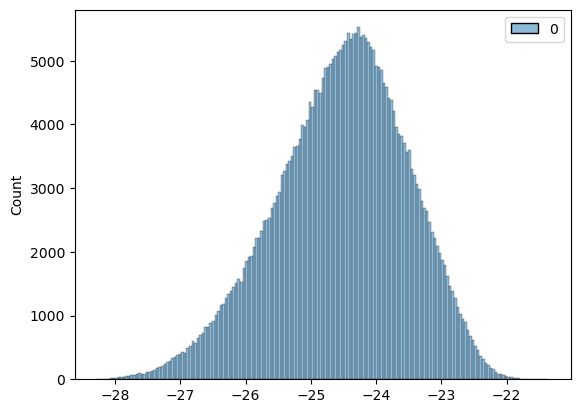

In [16]:
sns.histplot(M_I.astype(float))

In [ ]:
quasar = quasar_SDSS[np.logical_and(quasar_SDSS['Z']<3, quasar_SDSS['Z']>2)]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = 1
np.save('../catalogue/quasar_z>2', quasar_cata)

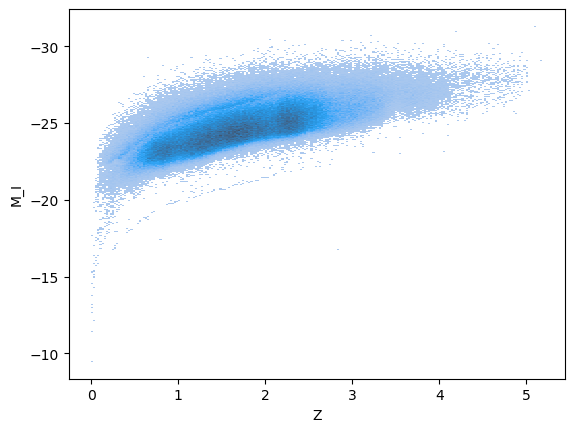

In [17]:
quasar_t = quasar_SDSS[np.logical_and(quasar_SDSS['Z']>0, quasar_SDSS['M_I']<0)]
sns.histplot({'Z': quasar_t['Z'].astype(float), 'M_I': quasar_t['M_I'].astype(float)}, x='Z', y='M_I')
plt.gca().invert_yaxis()

<Axes: ylabel='Count'>

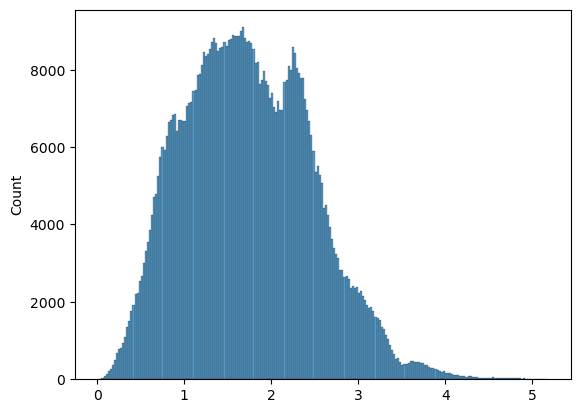

In [18]:
sns.histplot(quasar_t['Z'].astype(float))

In [10]:
quasar_SDSS['PSFMAG'].shape

(750414, 5)

In [12]:
quasar_SDSS['Z'].min()

-999.0

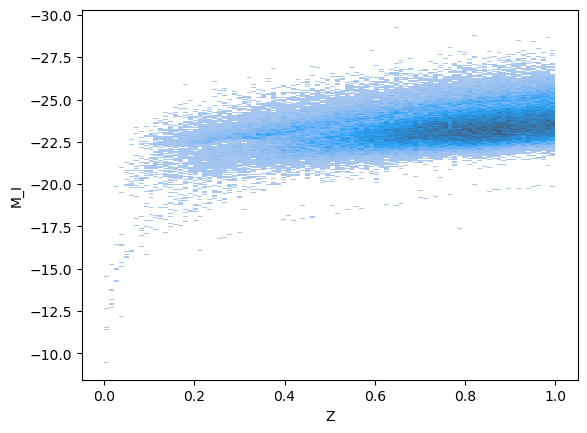

In [13]:
quasar_lowz = quasar_SDSS[np.logical_and(np.logical_and(quasar_SDSS['Z']>0, quasar_SDSS['Z']<1), quasar_SDSS['M_I']<0)]
sns.histplot({'Z': quasar_lowz['Z'].astype(float), 'M_I': quasar_lowz['M_I'].astype(float)}, x='Z', y='M_I')
plt.gca().invert_yaxis()

selection for lowz quasar: z < 1; M_I < -17.5(exclude the outliers)

In [16]:
selection = (quasar_SDSS['Z']>0) & (quasar_SDSS['Z']<1) & (quasar_SDSS['M_I']<-17.5)
quasar = quasar_SDSS[selection]
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = 1
np.save('../catalogue/quasar_lowz', quasar_cata)

In [17]:
len(quasar_cata)

132531